In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("ames_housing_data.csv")
df['TotalFloorSF'] = df['FirstFlrSF'] + df['SecondFlrSF']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['QualityIndex'] = df['OverallQual'] * df['OverallCond']
df['logSalePrice'] = np.log(df['SalePrice'])
df['price_sqft'] = df['SalePrice'] / df['TotalFloorSF']
print(df.shape)
print(df.info())
print(df.head())
print(df.columns)
print(df['price_sqft'].describe())

(2930, 87)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 87 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SID            2930 non-null   int64  
 1   PID            2930 non-null   int64  
 2   SubClass       2930 non-null   int64  
 3   Zoning         2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   int64  
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 87 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SID            2930 non-null   int64  
 1   PID            2930 non-null   int64  
 2   SubClass       2930 non-null   int64  
 3   Zoning         2930 non-null   object 
 4   LotFrontage    2440 non-null   float64
 5   LotArea        2930 non-null   int64  
 6   Street         2930 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2930 non-null   object 
 9   LandContour    2930 non-null   object 
 10  Utilities      2930 non-null   object 
 11  LotConfig      2930 non-null   object 
 12  LandSlope      2930 non-null   object 
 13  Neighborhood   2930 non-null   object 
 14  Condition1     2930 non-null   object 
 15  Condition2     2930 non-null   object 
 16  BldgType       2930 non-null   object 
 17  HouseStyle     2930 non-null   object 
 18  OverallQ

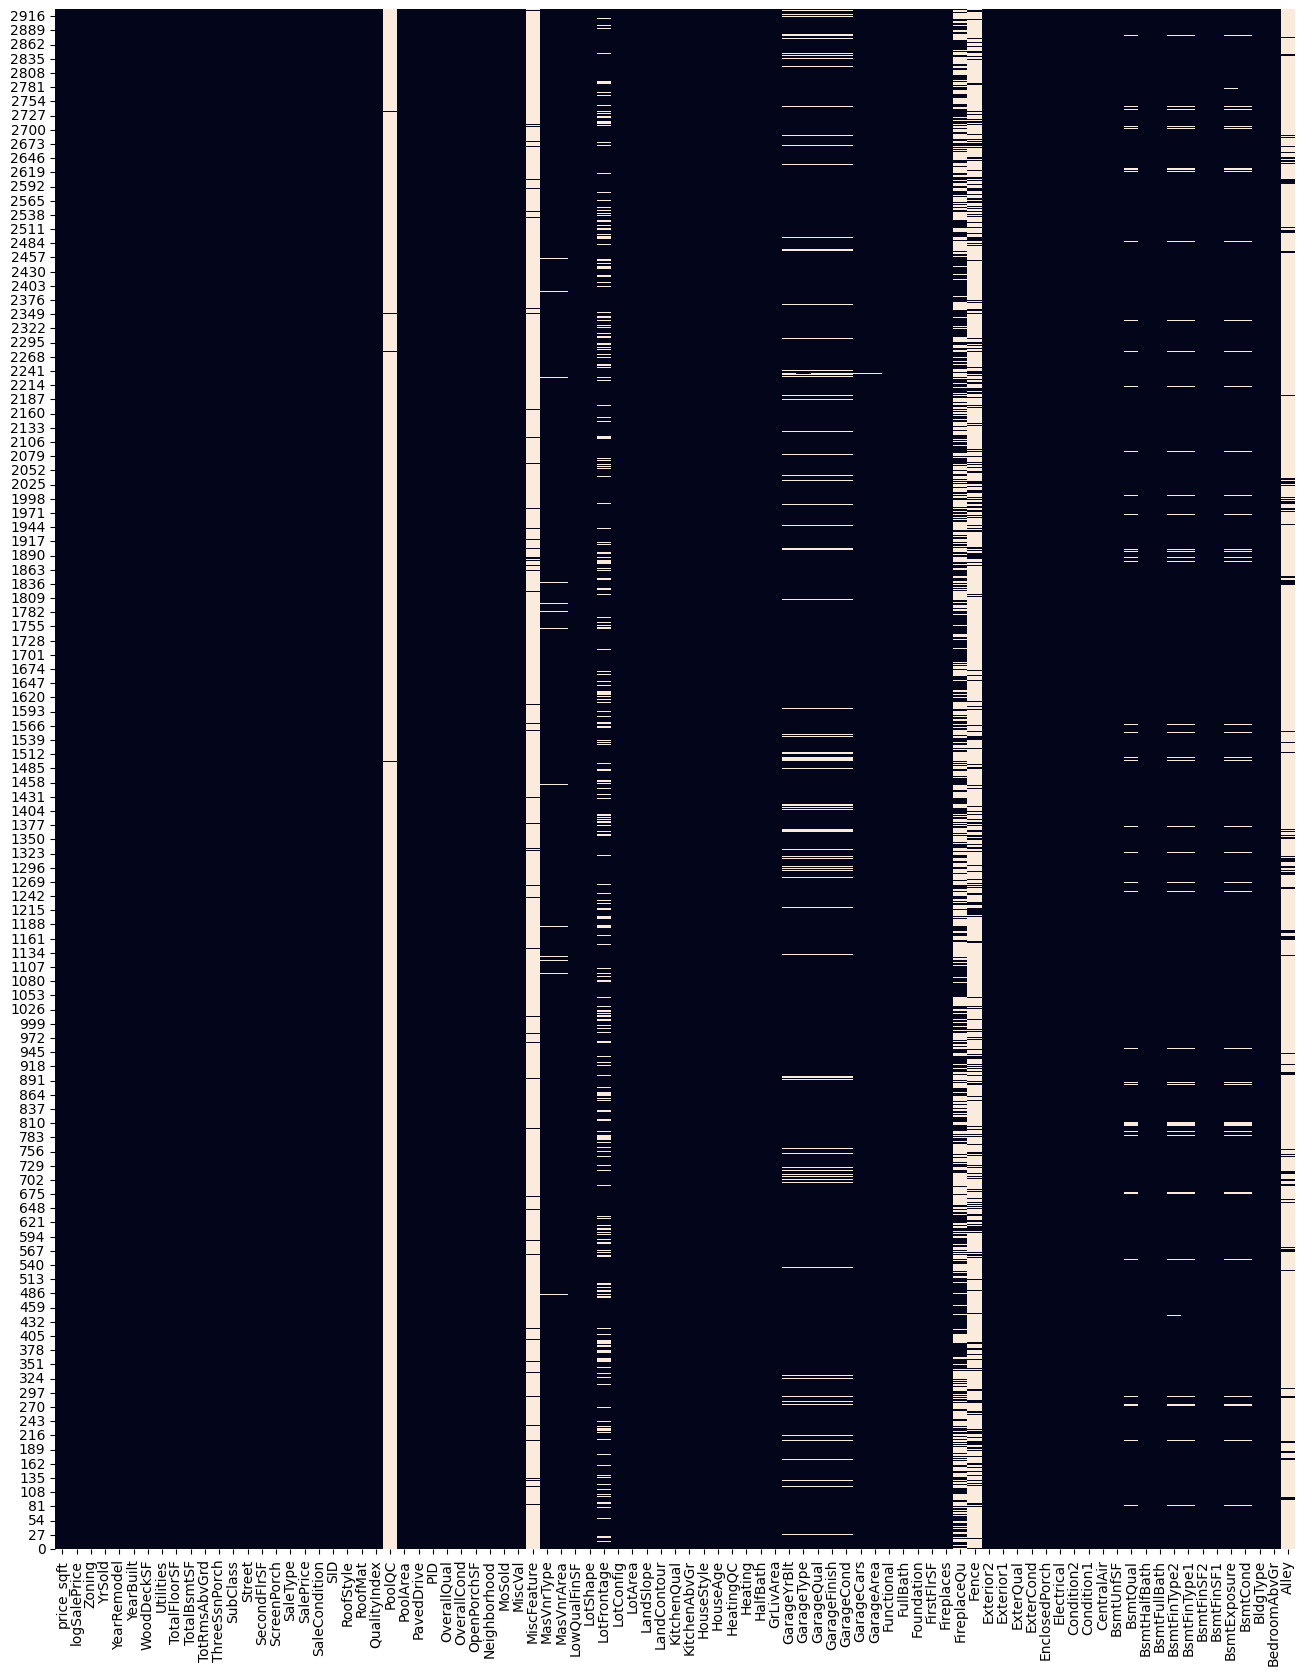

In [4]:
fig, ax = plt.subplots(figsize=(16, 20))
plt.rcParams["axes.grid"] = True

df_heat=df.sort_index(axis=1, ascending=False)

sns.heatmap(df_heat.isnull(), ax=ax, linecolor='white', cbar=False).invert_yaxis()
plt.yticks(rotation = 360)
plt.show()

In [5]:
Nulls=[]
for i in df.columns:
    if df[i].isnull().sum() > 0:
        Nulls.append(i)
        print("Column: {} Null Count: {}".format((i+"                      ")[0:18], df[i].isnull().sum()))
        

Column: LotFrontage        Null Count: 490
Column: Alley              Null Count: 2732
Column: MasVnrType         Null Count: 23
Column: MasVnrArea         Null Count: 23
Column: BsmtQual           Null Count: 80
Column: BsmtCond           Null Count: 80
Column: BsmtExposure       Null Count: 83
Column: BsmtFinType1       Null Count: 80
Column: BsmtFinSF1         Null Count: 1
Column: BsmtFinType2       Null Count: 81
Column: BsmtFinSF2         Null Count: 1
Column: BsmtUnfSF          Null Count: 1
Column: TotalBsmtSF        Null Count: 1
Column: Electrical         Null Count: 1
Column: BsmtFullBath       Null Count: 2
Column: BsmtHalfBath       Null Count: 2
Column: FireplaceQu        Null Count: 1422
Column: GarageType         Null Count: 157
Column: GarageYrBlt        Null Count: 159
Column: GarageFinish       Null Count: 159
Column: GarageCars         Null Count: 1
Column: GarageArea         Null Count: 1
Column: GarageQual         Null Count: 159
Column: GarageCond         Null Co

In [6]:
df[df['LotFrontage'].isnull()]

,SID,PID,SubClass,Zoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFloorSF,HouseAge,QualityIndex,logSalePrice,price_sqft
11,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,...,3,2010,WD,Normal,185000,1187,18,42,12.128111,155.855097
14,15,527182190,120,RL,NaN,6820,Pave,NaN,IR1,Lvl,...,6,2010,WD,Normal,212000,1502,25,40,12.264342,141.145140
22,23,527368020,60,FV,NaN,7500,Pave,NaN,Reg,Lvl,...,1,2010,WD,Normal,216000,1674,10,35,12.283034,129.032258
23,24,527402200,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,...,3,2010,WD,Normal,149000,1004,40,42,11.911702,148.406375
24,25,527402250,20,RL,NaN,12537,Pave,NaN,IR1,Lvl,...,4,2010,WD,Normal,149900,1078,39,30,11.917724,139.053803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2895,916326010,20,RL,NaN,16669,Pave,NaN,IR1,Lvl,...,1,2006,WD,Normal,228000,1707,25,48,12.337101,133.567663
2897,2898,916403130,60,RL,NaN,11170,Pave,NaN,IR2,Lvl,...,4,2006,WD,Normal,250000,2514,16,35,12.429216,99.443119
2898,2899,916460070,20,RL,NaN,8098,Pave,NaN,IR1,Lvl,...,10,2006,WD,Normal,202000,1403,6,30,12.216023,143.977192
2912,2913,923226150,90,RL,NaN,11836,Pave,NaN,IR1,Lvl,...,3,2006,WD,Normal,146500,1652,36,25,11.894781,88.680387


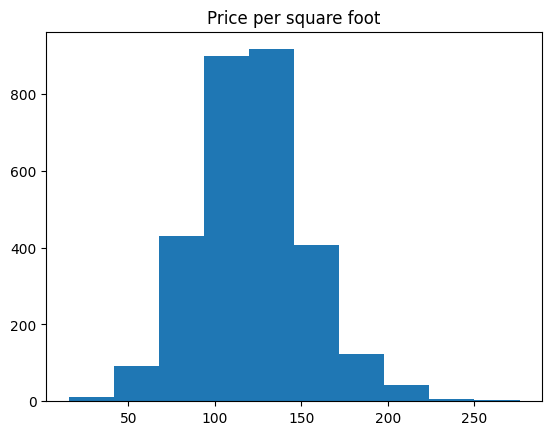

In [12]:
plt.hist(df['price_sqft'])
plt.title('Price per square foot')
plt.show()

In [7]:
subdat = df[["TotalFloorSF", "HouseAge", "QualityIndex", "price_sqft", 
                 "SalePrice", "LotArea", "BsmtFinSF1", "Neighborhood", 
                 "HouseStyle", "LotShape", "OverallQual", "logSalePrice", 
                 "TotalBsmtSF", "HouseStyle"]]
subdatnum = df[["TotalFloorSF", "HouseAge", "QualityIndex", 
                    "SalePrice", "LotArea", "OverallQual", "logSalePrice"]]
print(subdat.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalFloorSF  2930 non-null   int64  
 1   HouseAge      2930 non-null   int64  
 2   QualityIndex  2930 non-null   int64  
 3   price_sqft    2930 non-null   float64
 4   SalePrice     2930 non-null   int64  
 5   LotArea       2930 non-null   int64  
 6   BsmtFinSF1    2929 non-null   float64
 7   Neighborhood  2930 non-null   object 
 8   HouseStyle    2930 non-null   object 
 9   LotShape      2930 non-null   object 
 10  OverallQual   2930 non-null   int64  
 11  logSalePrice  2930 non-null   float64
 12  TotalBsmtSF   2929 non-null   float64
 13  HouseStyle    2930 non-null   object 
dtypes: float64(4), int64(6), object(4)
memory usage: 320.6+ KB
None


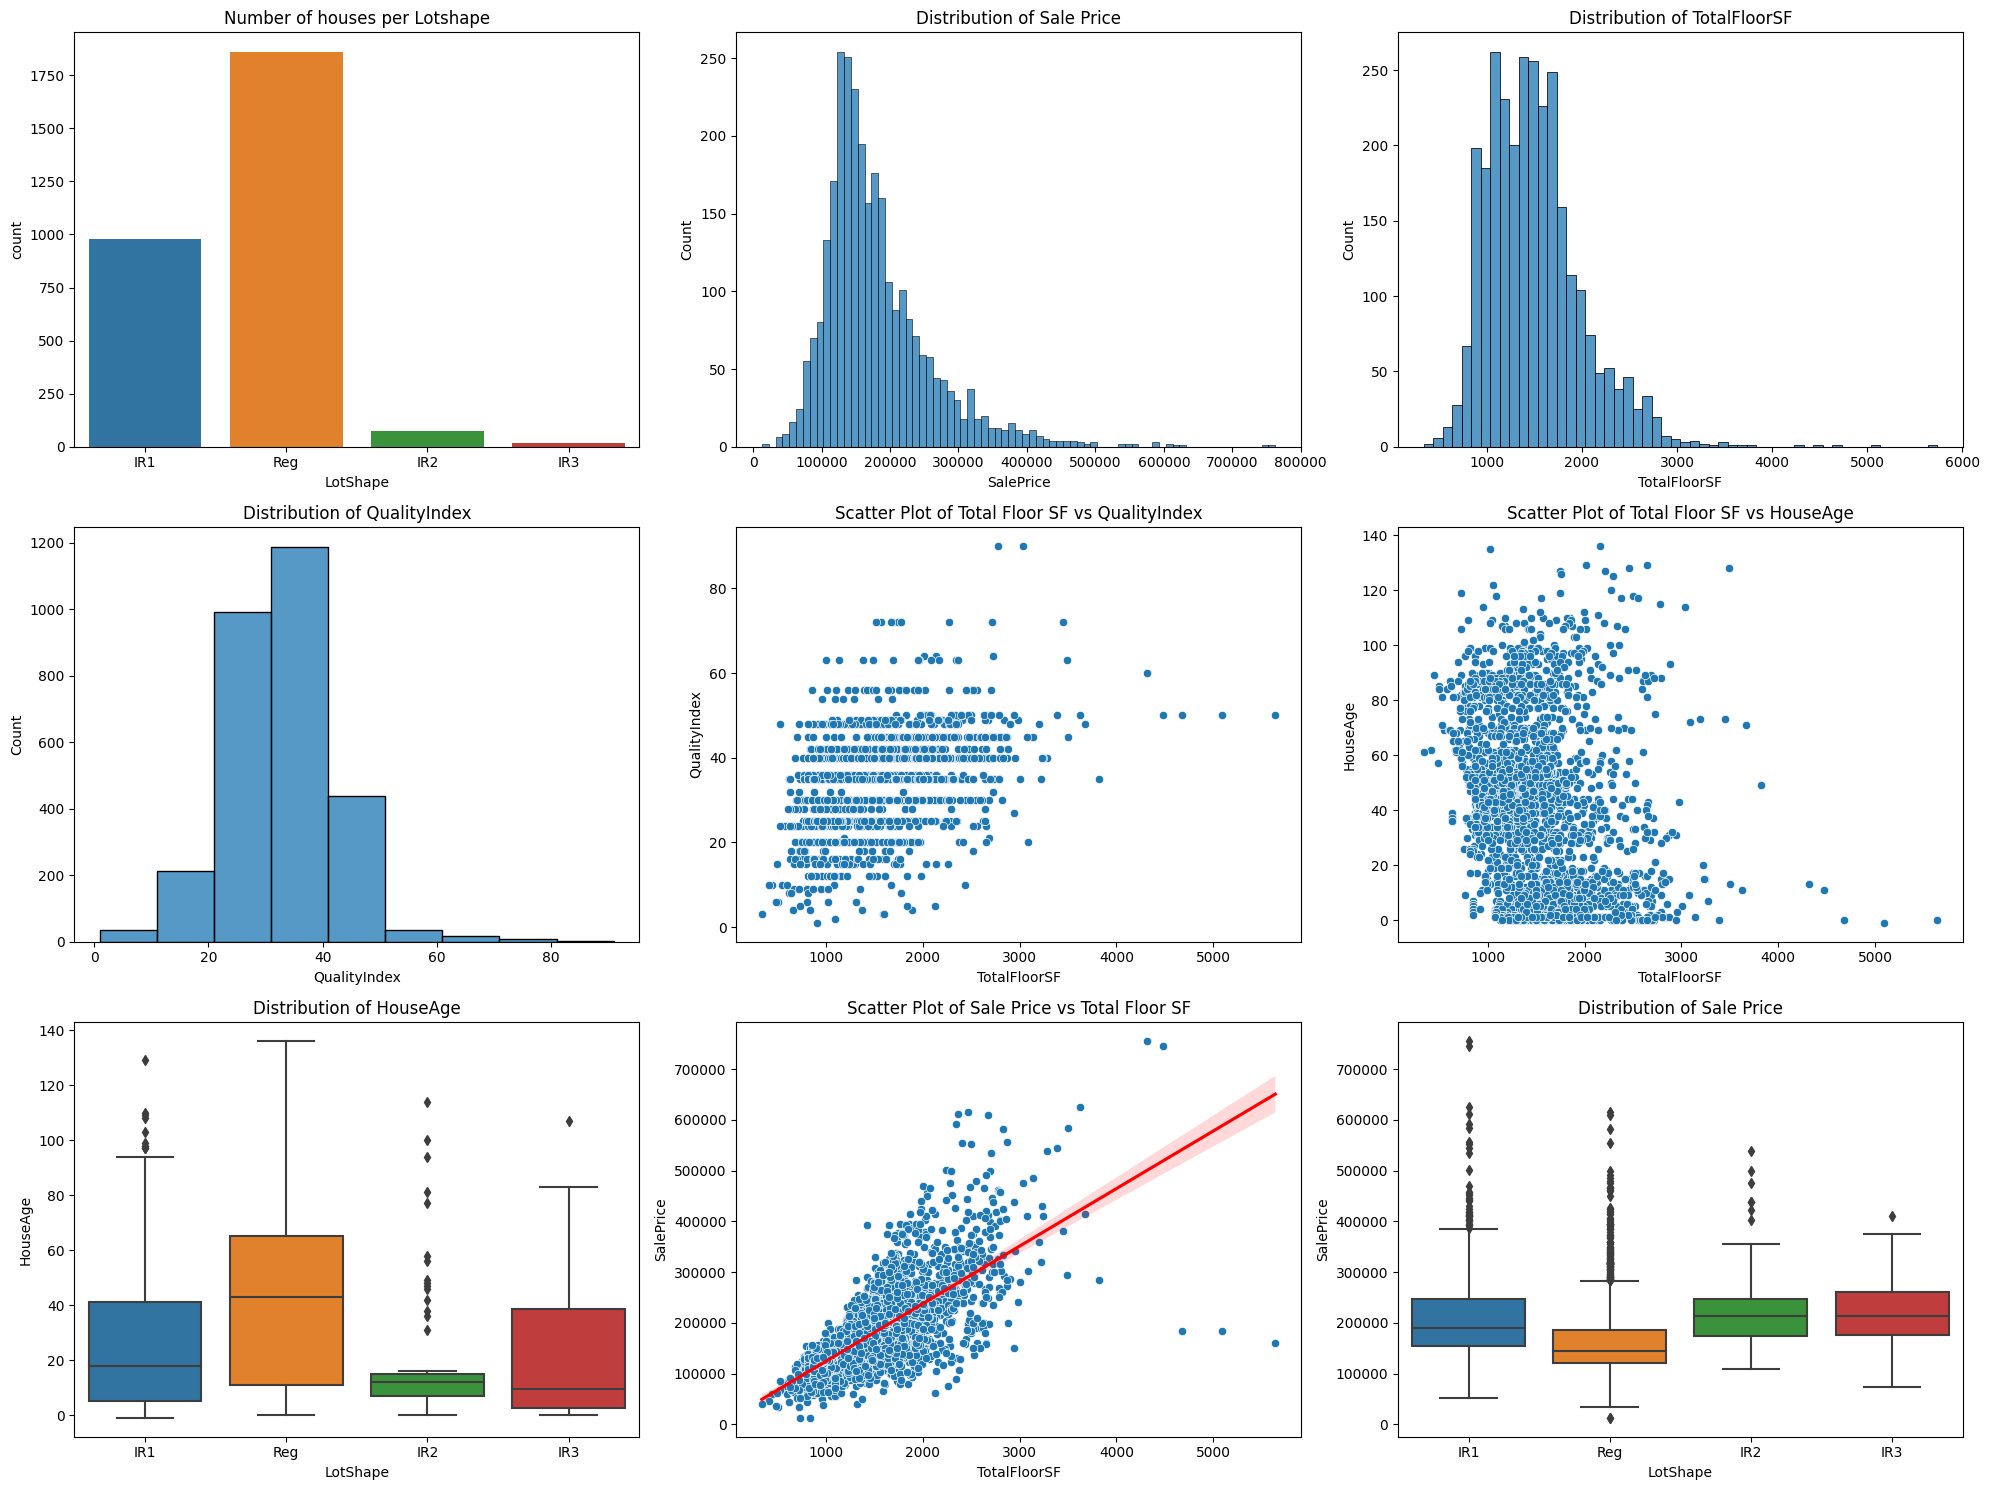

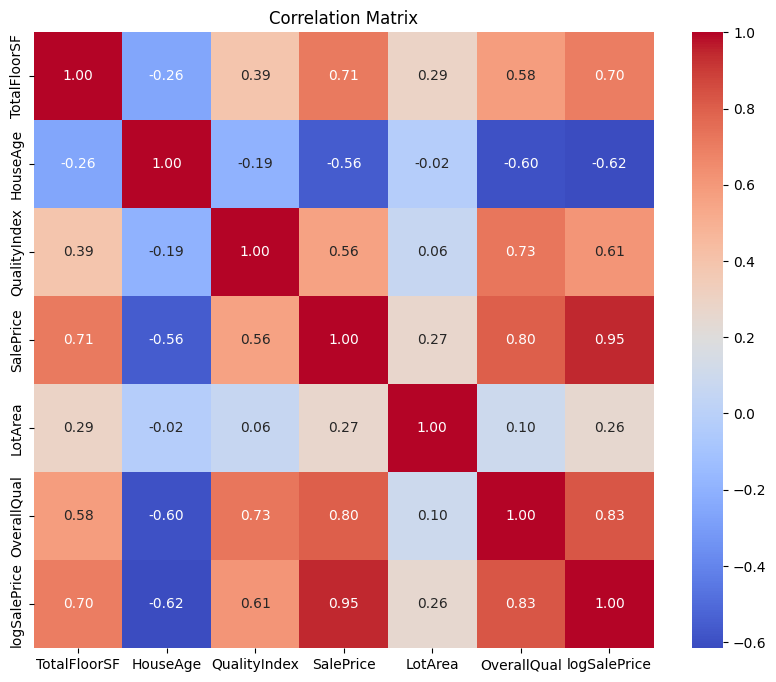

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
f, axes = plt.subplots(3, 3, figsize=(20, 15))

# Univariate EDA
sns.countplot(data=subdat, x='LotShape', ax=axes[0, 0]).set_title('Number of houses per Lotshape')

sns.histplot(data=subdat, x='SalePrice', binwidth=10000, ax=axes[0, 1]).set_title('Distribution of Sale Price')

sns.histplot(data=subdat, x='TotalFloorSF', binwidth=100, ax=axes[0, 2]).set_title('Distribution of TotalFloorSF')

sns.histplot(data=subdat, x='QualityIndex', binwidth=10, ax=axes[1, 0]).set_title('Distribution of QualityIndex')

# Bivariate EDA
sns.scatterplot(data=subdat, x='TotalFloorSF', y='QualityIndex', ax=axes[1, 1]).set_title('Scatter Plot of Total Floor SF vs QualityIndex')

sns.scatterplot(data=subdat, x='TotalFloorSF', y='HouseAge', ax=axes[1, 2]).set_title('Scatter Plot of Total Floor SF vs HouseAge')

sns.boxplot(data=subdat, x='LotShape', y='HouseAge', ax=axes[2, 0]).set_title('Distribution of HouseAge')

# Model focussed EDA
sns.scatterplot(data=subdat, x='TotalFloorSF', y='SalePrice', ax=axes[2, 1]).set_title('Scatter Plot of Sale Price vs Total Floor SF')
sns.regplot(data=subdat, x='TotalFloorSF', y='SalePrice', scatter=False, color='red', ax=axes[2, 1])

sns.boxplot(data=subdat, x='LotShape', y='SalePrice', ax=axes[2, 2]).set_title('Distribution of Sale Price')

plt.tight_layout()
plt.show()

# Correlation plot
corr = subdatnum.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

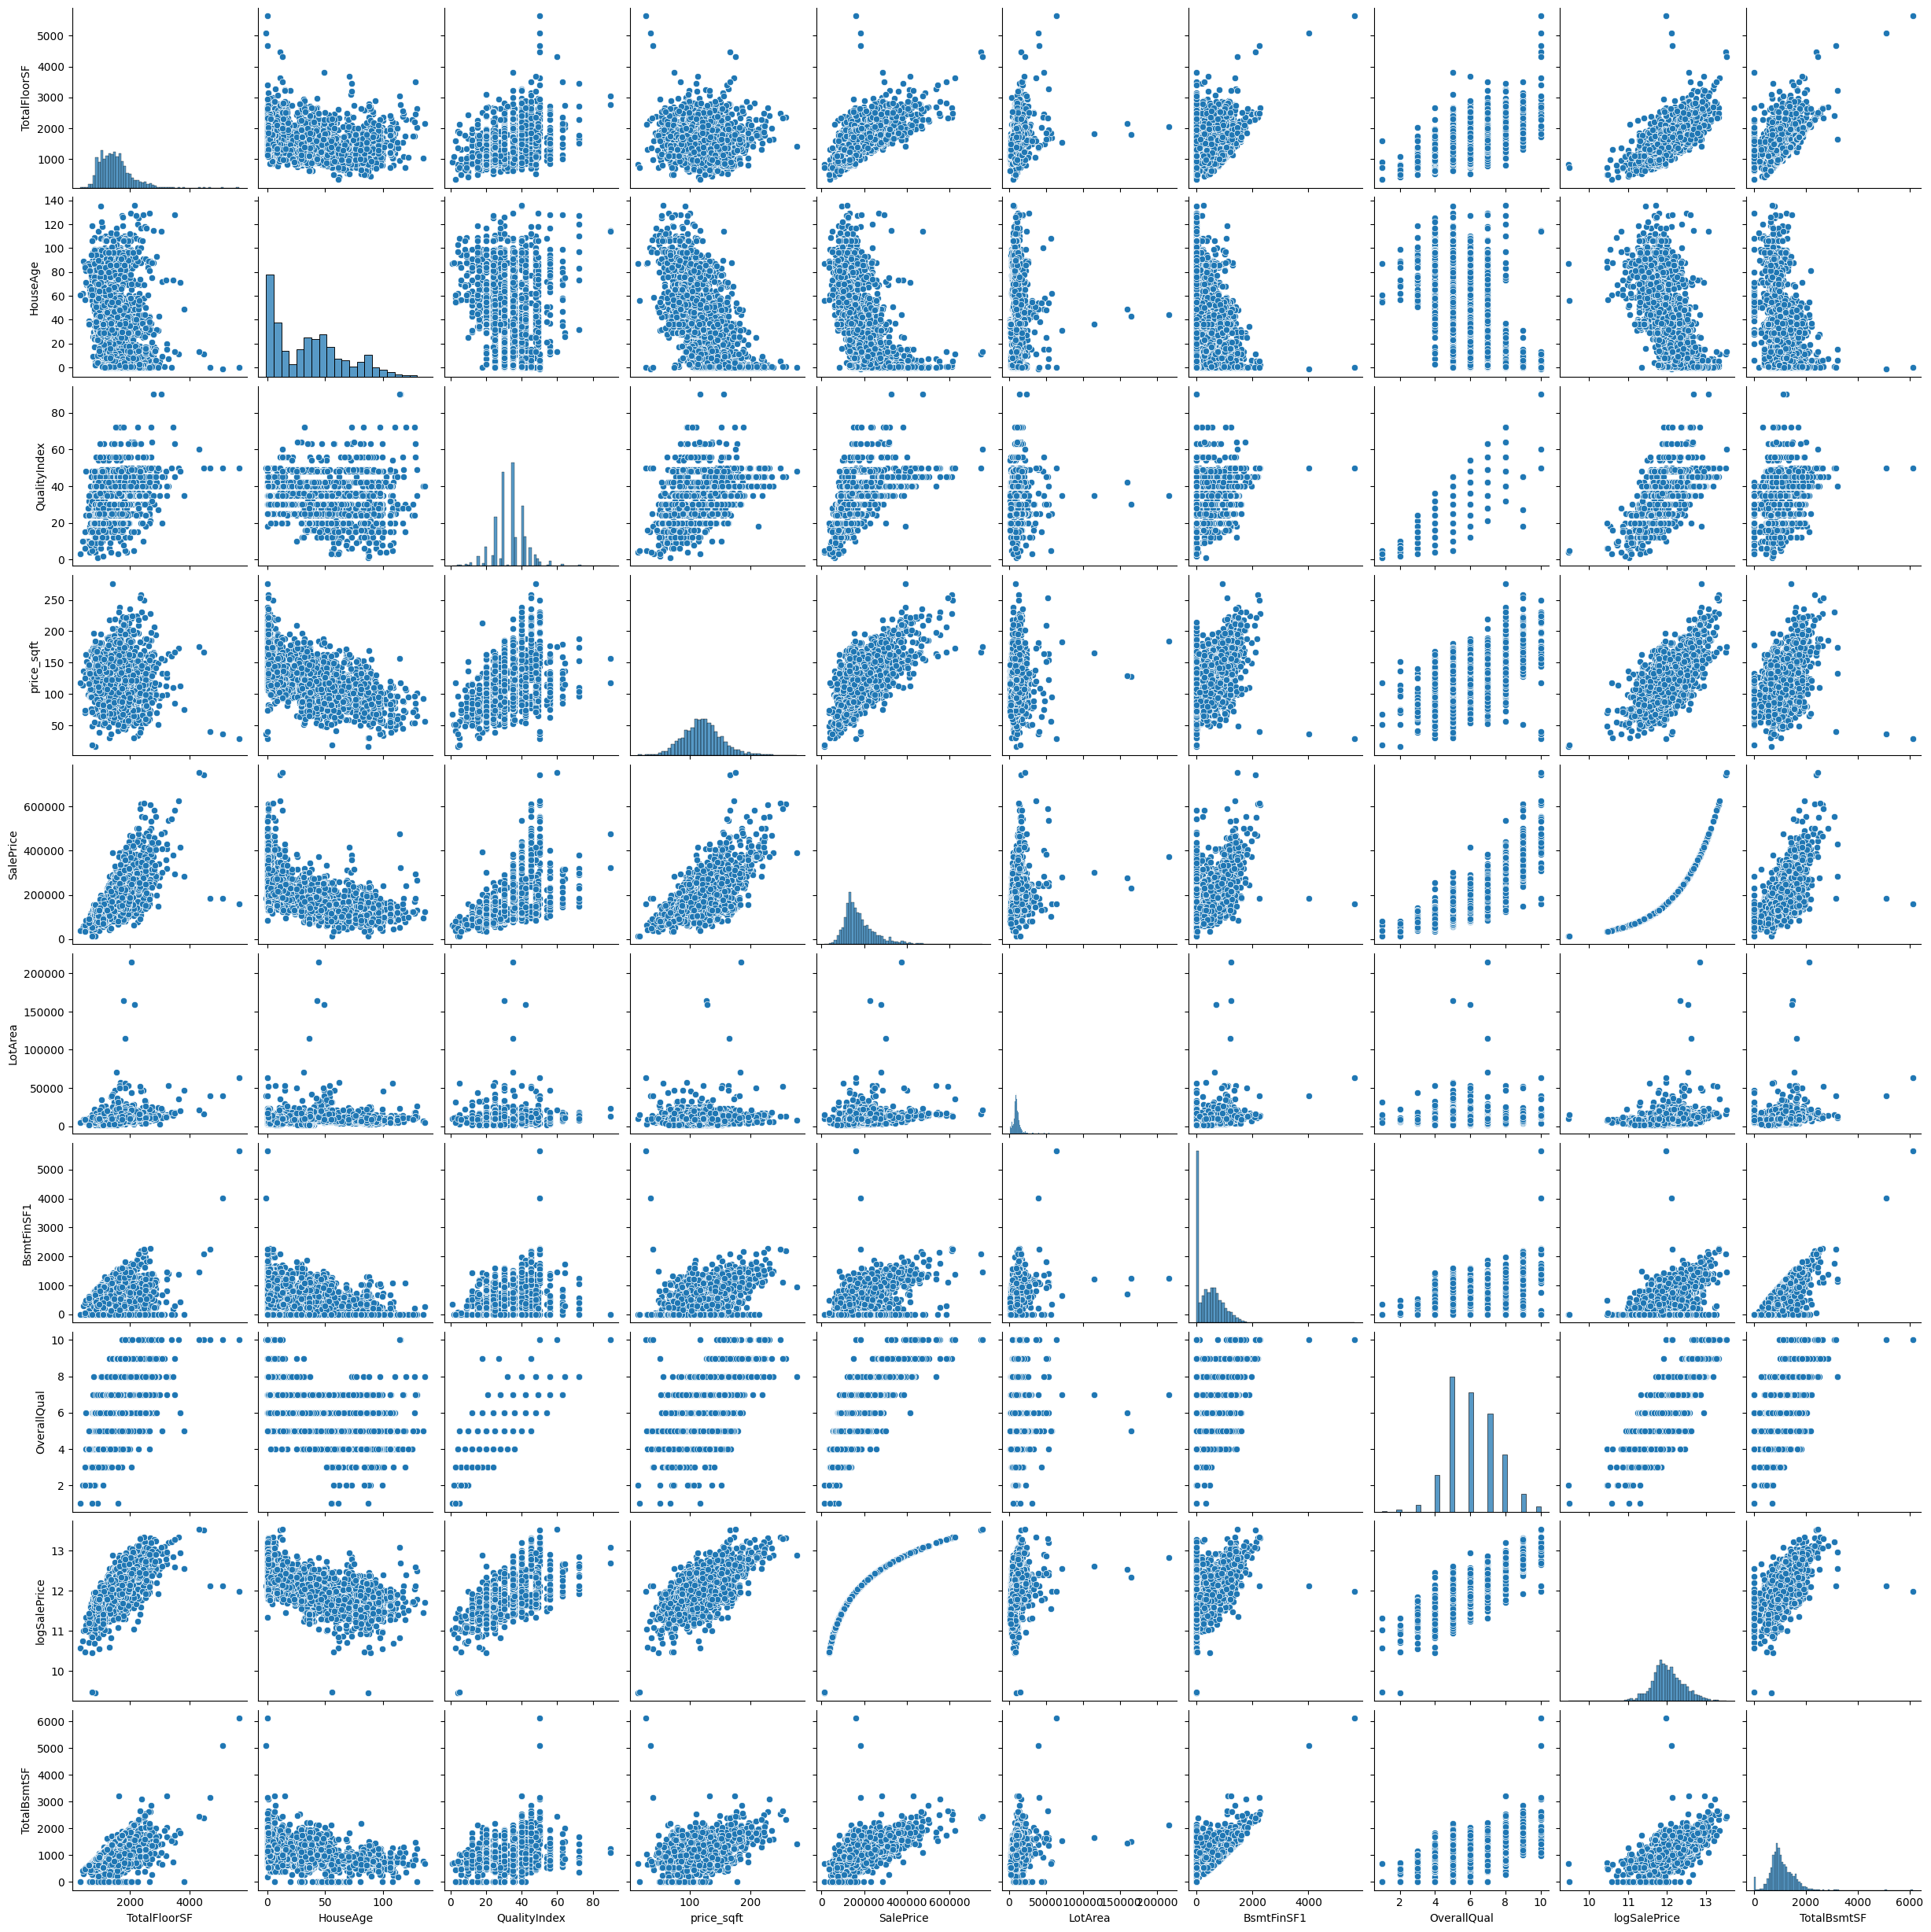

In [17]:
subdat_numeric = subdat.select_dtypes(include=np.number)
sns.pairplot(subdat_numeric)
plt.show()

In [ ]:
This is an 